# **Movie Recommendation System using Deep Boltzman Machines**

**Objective**: To Design a deep boltzmann machine architecture for the movie recommendation system where top 5 movies are to be recommended for a specific user.

**Importing Libraries**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

**Loading and processing dataset**

In [ ]:
ratings = tf.keras.utils.get_file('ratings.csv', 'http://files.grouplens.org/datasets/movielens/ml-100k/u.data')
movies = tf.keras.utils.get_file('movies.csv', 'http://files.grouplens.org/datasets/movielens/ml-100k/u.item')

ratings_data = np.loadtxt(ratings, delimiter='\t')
movies_data = [line.decode('ISO-8859-1').split('|') for line in open(movies, 'rb').readlines()]

num_users = int(max(ratings_data[:, 0]))
num_movies = int(max(ratings_data[:, 1]))

user_item_matrix = np.zeros((num_users, num_movies))
for line in ratings_data:
    user_item_matrix[int(line[0]) - 1][int(line[1]) - 1] = line[2]

236344/236344 [==============================] - 1s 3us/step


**Splitting Train, Test sets and Training the model**

In [ ]:
train_data = user_item_matrix[:600, :]
val_data = user_item_matrix[600:800, :]
test_data = user_item_matrix[800:, :]

visible = Input(shape=(num_movies,))
hidden1 = Dense(1024, activation='sigmoid')(visible)
hidden2 = Dense(512, activation='sigmoid')(hidden1)
hidden3 = Dense(256, activation='sigmoid')(hidden2)
visible_reconstructed = Dense(num_movies, activation='sigmoid')(hidden3)
rbm = Model(inputs=visible, outputs=visible_reconstructed)

rbm.compile(optimizer='adam', loss='mean_squared_error')
history = rbm.fit(train_data, train_data, epochs=150, batch_size=64, validation_data =(val_data, val_data))

Epoch 1/150
10/10 [==============================] - 1s 25ms/step - loss: 0.8432 - val_loss: 0.6395
Epoch 2/150
10/10 [==============================] - 0s 6ms/step - loss: 0.7595 - val_loss: 0.6325
Epoch 3/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7558 - val_loss: 0.6322
Epoch 4/150
10/10 [==============================] - 0s 8ms/step - loss: 0.7549 - val_loss: 0.6306
Epoch 5/150
10/10 [==============================] - 0s 8ms/step - loss: 0.7545 - val_loss: 0.6302
Epoch 6/150
10/10 [==============================] - 0s 8ms/step - loss: 0.7540 - val_loss: 0.6316
Epoch 7/150
10/10 [==============================] - 0s 8ms/step - loss: 0.7540 - val_loss: 0.6310
Epoch 8/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7537 - val_loss: 0.6291
Epoch 9/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7525 - val_loss: 0.6289
Epoch 10/150
10/10 [==============================] - 0s 6ms/step - loss: 0.7506 - val_loss: 0.6260
Epoch 11

**Plotting Training and Validation Loss of the model over epochs**

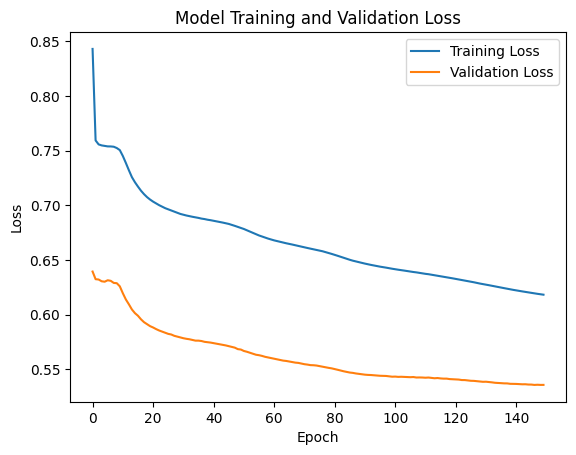

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

**Making predictions (recommendations)**



In [ ]:
user_id = 1
user_ratings = train_data[user_id - 1]
predicted_ratings = rbm.predict(np.array([user_ratings]))

num_recommendations = 5
recommended_movie_indices = np.argsort(predicted_ratings[0])[::-1][:num_recommendations]

print("Top 5 recommended movies for User", user_id)
for i, index in enumerate(recommended_movie_indices):
    movie_title = movies_data[index][1]
    print(f"{i + 1}. {movie_title}")

1/1 [==============================] - 0s 104ms/step
Top 5 recommended movies for User 1
1. Godfather, The (1972)
2. Twelve Monkeys (1995)
3. Pulp Fiction (1994)
4. Independence Day (ID4) (1996)
5. Toy Story (1995)
